In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
# Посмотрим на инфо датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
# Посмотрим на описание признаков
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


Все данные подготовлены. Нормализуем их перед обучением алгоритма логистической регрессии.

In [5]:
X = data.drop(['affair'], axis=1)
y = data.affair
X_columns = X.columns

In [6]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
norm_array = min_max.fit_transform(X)
X = pd.DataFrame(norm_array, columns=X_columns)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,0.50,0.591837,0.377778,0.545455,0.666667,0.727273,0.2,0.8
1,0.50,0.387755,0.555556,0.545455,0.000000,0.454545,0.4,0.6
2,0.75,0.183673,0.088889,0.000000,0.000000,0.636364,0.4,0.8
3,0.75,0.795918,0.711111,0.727273,0.666667,0.636364,0.8,0.8
4,1.00,0.387755,0.377778,0.181818,0.000000,0.454545,0.4,0.6


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Обучим три модели:  
1) без признака **rate_marriage**  
2) без признака **yrs_married**  
3) со всеми признаками

По предсказаниям этих моделей построим графики *ROC-кривой* на посчитанных *FPR* и *TPR* вручную и встроенной метрикой *roc_curve*.

In [8]:
model1 = LogisticRegression()
model2 = LogisticRegression()
model3 = LogisticRegression()

In [9]:
# Посмотрим на accuracy в зависимости от random_state
for i in range(10):
    X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    model1.fit(X3_train, y3_train)
    print(i, model1.score(X3_test, y3_test))

0 0.7417582417582418
1 0.7315541601255887
2 0.716640502354788
3 0.7150706436420722
4 0.7048665620094191
5 0.7229199372056515
6 0.7205651491365777
7 0.7315541601255887
8 0.7040816326530612
9 0.7142857142857143


In [10]:
X1 = X.drop(['rate_marriage'], axis=1)
X2 = X.drop(['yrs_married'], axis=1)

In [11]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=0)
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
model1.fit(X1_train, y1_train)
model2.fit(X2_train, y2_train)
model3.fit(X3_train, y3_train)

LogisticRegression()

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [14]:
print('For model1:')
print('accuracy: %.3f' % accuracy_score(y1_test, model1.predict(X1_test)))
print('precision: %.3f' % precision_score(y1_test, model1.predict(X1_test)))
print('recall: %.3f' % recall_score(y1_test, model1.predict(X1_test)))
print('-----------------')
print('For model2:')
print('accuracy: %.3f' % accuracy_score(y2_test, model2.predict(X2_test)))
print('precision: %.3f' % precision_score(y2_test, model2.predict(X2_test)))
print('recall: %.3f' % recall_score(y2_test, model2.predict(X2_test)))
print('-----------------')
print('For model3:')
print('accuracy: %.3f' % accuracy_score(y3_test, model3.predict(X3_test)))
print('precision: %.3f' % precision_score(y3_test, model3.predict(X3_test)))
print('recall: %.3f' % recall_score(y3_test, model3.predict(X3_test)))


For model1:
accuracy: 0.700
precision: 0.526
recall: 0.183
-----------------
For model2:
accuracy: 0.738
precision: 0.638
recall: 0.326
-----------------
For model3:
accuracy: 0.742
precision: 0.635
recall: 0.362


In [15]:
prediction1 = model1.predict_proba(X1_test)
prediction2 = model2.predict_proba(X2_test)
prediction3 = model3.predict_proba(X3_test)

Построим кривую *ROC AUC* с помощью следующего метода. 
Данные для примера взяты с сайта [dyakonov.org](https://dyakonov.org/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/).  

Упорядочим предсказанные вероятности исходов по убыванию вместе с соответствующими предсказанными метками классов как на **табл.1** и **табл.2**. В отличии от **табл.3**, где порог равен 0.25, в нашем случае порог равен 0.5. Далее разобъём квадрат  на m (по вертикали) × n (по горизонтали) блоков, где m – число 1 среди правильных меток (в примере m=3), n – число нулей (n=4). Для того, чтобы нарисовать точку кривой, будем соотносить упорядоченным вероятностям (начиная с большей) истинные метки класса (в **табл.2** и **табл.3** колонка *класс*) и, стартуя из точки (0, 0), будем ставить точку на оси абсцисс с шагом $\frac{1}{m}$, если значение метки класса в просматриваемой строке 1, или на оси ординат с шагом $\frac{1}{n}$, если значение 0. Если значения вероятностей совпадают, то будем ставить точку на расстоянии по оси абсцисс: $\frac{1}{m}\times$$\big($количество меток равных 1 с совпадающими вероятностями$\big)$ и по оси ординат: $\frac{1}{n}\times$$\big($количество меток равных 0 с совпадающими вероятностями$\big)$ (в примере на рисунке id3 и id5).
![](http://alexanderdyakonov.files.wordpress.com/2017/07/table.png)  
![](http://alexanderdyakonov.files.wordpress.com/2017/07/pic3.png)

In [19]:
def Roc_Curve(proba_prediction, observation):
    
    """В качесте параметров два массива:
       1) предсказанные вероятности  исхода положительного события
       2) метки положительного или отрицательного класса
       Возвращает два массива координат точек кривой ROC AUC: абсцисс и ординат"""
    
    
    roc_df = pd.DataFrame({'pred_proba': proba_prediction, 'observation': observation})\
                     .sort_values(by='pred_proba', ascending=False).reset_index()
    a = roc_df.pred_proba.values
    b = roc_df.observation.values    
    tpr_arr = np.array([])
    fpr_arr = np.array([])
    m = sum(b)
    n = len(b) - m
    d1 = 1 / n
    d2 = 1 / m
    tpr0 = 0
    fpr0 = 0
    k = 0
    l = 0
    
    for i in range(len(a) - 1):
        if a[i] != a[i+1]:
            if b[i] == 1:
                k += 1
            else:
                l += 1
            fpr_arr = np.append(fpr_arr, l)
            tpr_arr = np.append(tpr_arr, k)
        else:
            if b[i] == 1:
                k += 1
            else:
                l += 1

    if a[-1] != a[-2]:
        if b[i] == 1:
            k += 1
        else:
            l += 1    

    fpr_arr = np.append(fpr_arr, l)
    tpr_arr = np.append(tpr_arr, k)
    
    return fpr_arr, tpr_arr

Построим кривую *ROC AUC* встроенной метрикой в библиотеке *sklearn*.

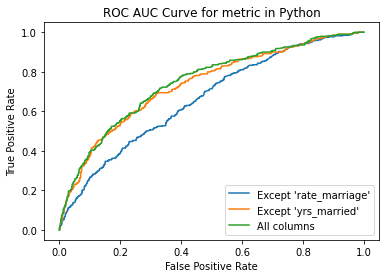

In [18]:
from sklearn.metrics import roc_curve

fpr_metric1, tpr_metric1, thres1 = roc_curve( y1_test, prediction1[:, 1] )
fpr_metric2, tpr_metric2, thres2 = roc_curve( y2_test, prediction2[:, 1] )
fpr_metric3, tpr_metric3, thres3 = roc_curve( y3_test, prediction3[:, 1] )

plt.plot( fpr_metric1, tpr_metric1, label = "Except 'rate_marriage'" )
plt.plot( fpr_metric2, tpr_metric2, label = "Except 'yrs_married'" )
plt.plot( fpr_metric3, tpr_metric3, label = "All columns" )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for metric in Python')
plt.legend( loc = 0 )
plt.show()

Построим кривую *ROC AUC* с помощью созданной функции *Roc_Curve*.

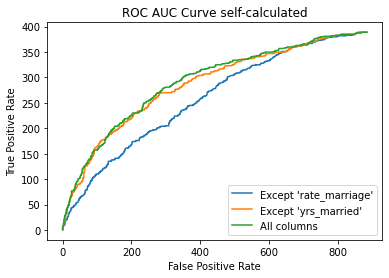

In [20]:
fpr_arr1, tpr_arr1 = Roc_Curve(prediction1[:, 1], y1_test)
fpr_arr2, tpr_arr2 = Roc_Curve(prediction2[:, 1], y2_test)
fpr_arr3, tpr_arr3 = Roc_Curve(prediction3[:, 1], y3_test)

plt.plot( fpr_arr1, tpr_arr1, label = "Except 'rate_marriage'" )
plt.plot( fpr_arr2, tpr_arr2, label = "Except 'yrs_married'" )
plt.plot( fpr_arr3, tpr_arr3, label = "All columns" )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve self-calculated')
plt.legend( loc = 0 )
plt.show()